<a href="https://colab.research.google.com/github/d-bxiin/ComputerVision_Seminar/blob/main/week4_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

In [ ]:
import torch
import torchvision
from torchvision import transforms #이미지 데이터 augmentation
import os 
import glob

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42) #42는 의미 없음
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [ ]:
device

'cuda'

- TPU : colab에서만 제공하는데 GPU보다 몇배는 빠름.
- pytorch의 단점 : colab에서만 제공하는 TPU를 사용하기가 애매함. 
- pytorch로 할땐, 웬만하면 TPU사용 안함

In [ ]:
root_path = '/content/drive/MyDrive/CV_seminar_project/'
train_path = '/content/drive/MyDrive/CV_seminar_project/train/'
test_path = '/content/drive/MyDrive/CV_seminar_project/test/'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

# pytorch 데이터셋 클래스 실습

### 파이토치 데이터셋 클래스 직접 만들기
1. __init__생성자가 필요함.
2. __getitem__필요함. -> 데이터를 읽는 역할 (인덱스 부여, iterable)
3. __len__ 필요함. -> 데이터 개수를 알려주는 역할

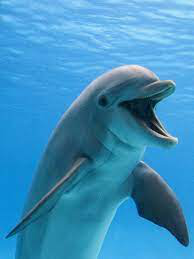

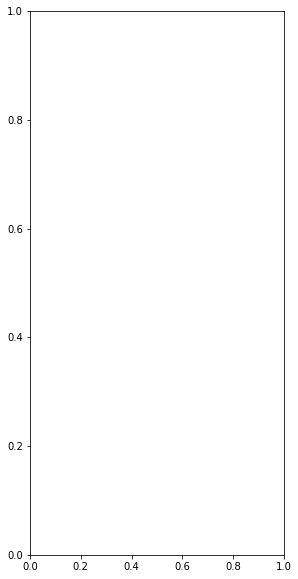

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

img = cv2.imread(dolphin_img_list[0]) # 이미지를 BGR로 읽음
plt.subplot(1,2,1)
# cv2.imshow(img) # 방법 1 -> 에러 남
# plt.imshow(img[:,:,::-1]) # 방법 2 -> RGB로 읽어야 해서 바뀜.
PILImage.open(dolphin_img_list[0]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음

# plt.subplot(1,2,2)
# plt.imshow(img[])

In [ ]:
from torch.utils.data import Dataset, DataLoader #커스터마이징
import cv2
import os

class Custom_dataset(Dataset):
  def __init__(self, root_path, mode, transforms=None) : #특수메소드 생성자
    self.all_data = sorted(glob.glob(os.path.join(root_path, mode, '*', '*'))) # 데이터경로
    #mode : train/valid/test : 데이터셋 종류
    self.transforms = transforms # augmentation

  def __getitem__(self, index):
    if torch.is_tensor(index):
      index = index.tolist()

    # 이미지 읽기기
    data_path = self.all_data[index]
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #채널 측 : BGR -> RGB

    # transforms(Augmentation)
    if self.transforms is not None : #클래스 생성할때 인자를 넣어줬으면
      augmentation = self.transforms(image = image)
      image = augmentation['image']

    # label 만들어주기..
    label = []
    if 'dolphin' in data_path.split('/')[-1]  :
      label = 0
    elif 'shark' in data_path.split('/')[-1]  :
      label = 1
    else : 
      label = 2 

    return image, label

  def __len__(self):
    length = len(self.all_data) # 전체데이터개수
    return length


In [ ]:
pytorch_dataset = 

잘 만들었는지 확인해보자

In [ ]:
root_path = '/content/drive/MyDrive/CV_seminar_project/'
train_path = '/content/drive/MyDrive/CV_seminar_project/train/'
test_path = '/content/drive/MyDrive/CV_seminar_project/test/'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

pytorch_dataset = Custom_dataset(root_path = root_path, mode= 'train', transforms=None)

from PIL import Image as PILImage
PILImage.open(pytorch_dataset.all_data[0])

train_loader = torch.utils.data.DataLoader(pytorch_dataset, batch_size=1,
                                           shuffle=None, num_workers=0)
for data,label in train_loader :
  break

IndexError: ignored

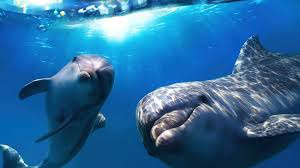

In [ ]:
from PIL import Image as PILImage
PILImage.open(pytorch_dataset.all_data[0])

In [ ]:
# 라벨 확인 
pytorch_dataset[0][1]

0

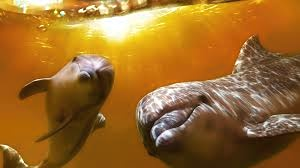

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

cv2_imshow(pytorch_dataset[0][0])

위에서까지 이미지가 잘 나왔으면 통과!
- 2. 더 강력한 augmentation 툴 albumentation이용하기기

In [ ]:
# import albumentations
# import albumentations.pytorch

# albumentations = albumentations.Compose([
#     albumentations.Resize(224, 224),
#     #뒤집기, 돌리기
#     albumentations.OneOf([ ##OneOf :  안에 있는 기법들 중 하나를 사용
#         albumentations.HorizontalFlip(p=0.8), #상하반전
#         albumentations.VerticalFlip(p=0.8),
#         albumentations.RandomRotate90(p=0.8)
#     ], p = 1),

#     #픽셀값 장난
#     albumentations.OneOf([
#         albumentations.MotionBlur(p=0.8), #흐리게
#         albumentations.OpticalDistortion(p=0.8), #왜곡 넣기
#         albumentations.GaussNoise(p=0.8) #노이즈 넣기
#     ], p = 1)
#     #albumentations.pytorch.transforms.ToTensorV2() #0~1만들기
# ])

# pytorch_dataset = Custom_dataset(root_path = root_path, mode= 'train', transforms=albumentations)

In [ ]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 # albumentations 텐서화 함수

train_transforms = A.Compose([ #Compose : 여러개를 동시에 적용, Compose자체에도 확률 적용가능능
    A.Resize(224,224),
    A.Transpose(p=0.5),
    A.HorizontalFlip(p=0.5), #좌우반전
    A.VerticalFlip(p=0.5), #상하반전
    A.ShiftScaleRotate(p=0.5), 
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=20, val_shift_limit=20, p=0.5), #색도, 채도, 명도 변경경
    A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5), #밝기 및 대비를 랜덤 지정
    A.ChannelShuffle(), #RGB채널을 랜덤하게 섞음.
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0), # 이미지넷 데이터셋 통계값으로 Normalize
    A.CoarseDropout(p=0.5), # 약간씩 없애기기
    ToTensorV2()
])

test_transforms = A.Compose([
    A.Resize(224,224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0), # 텐서타입은 안해줌
    ToTensorV2() # Normalize를 먼저하고 tensor화를 진행해야한다.
])



In [ ]:
### Pytorch 데이터 클래스 생성
train_class = Custom_dataset(root_path=root_path, mode='train', transforms=train_transforms)
valid_class = Custom_dataset(root_path=root_path, mode='valid', transforms=test_transforms)
test_class = Custom_dataset(root_path=root_path, mode='test', transforms=test_transforms)

### Pytorch BatchLoader 생성 (학습에 이용할 최종 dataloader)
from torch.utils.data import DataLoader as DataLoader

train_loader = DataLoader(train_class, batch_size=8, shuffle = True, num_workers=0)
valid_loader = DataLoader(valid_class, batch_size=8, shuffle = False, num_workers=0)
test_loader = DataLoader(test_class, batch_size=8, shuffle = False, num_workers=0)

In [ ]:
# m = np.array([[[0.485, 0.456, 0.406]]]).reshape(1,1,3)
# s = np.array([[[0.229, 0.224, 0.225]]]).reshape(1,1,3)
# img = (train_class[0][0].permute(1,2,0).numpy() * (s*255.0)) + (m*255.0)
# plt.imshow(img.astype(int))
# #train_class[0][0].permute(1,2,0).numpy()

In [ ]:
def converter(augmentationed_image):
  m = np.array([[[0.485, 0.456, 0.406]]]).reshape(1,1,3)
  s = np.array([[[0.229, 0.224, 0.225]]]).reshape(1,1,3)
  img = (augmentationed_image.permute(1,2,0).numpy() * (s*255.0)) + (m*255.0)
  return img

(-0.5, 223.5, 223.5, -0.5)

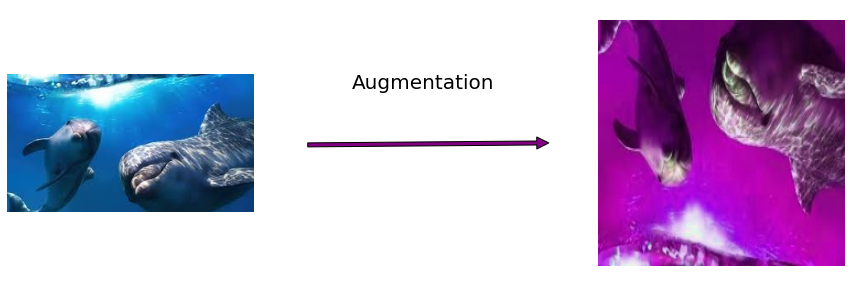

In [ ]:
from PIL import Image as PILImage

fig = plt.figure(figsize=(15,5))
axs = fig.subplots(1,3)

image_1 = cv2.imread(train_class.all_data[0])
axs[0].imshow(image_1[:,:,::-1])
axs[0].axis('off')


axs[1].axis('off')
axs[1].text(0.2, 0.7,'Augmentation', fontsize=20)
axs[1].annotate(' ', xy=(1, 0.5), xytext=(0, 0.5), arrowprops=dict(facecolor='purple'))

# m = np.array([[[0.485, 0.456, 0.406]]]).reshape(1,1,3)
# s = np.array([[[0.229, 0.224, 0.225]]]).reshape(1,1,3)
# img = (train_class[0][0].permute(1,2,0).numpy() * (s*255.0)) + (m*255.0)
converter(train_class[0][0])
axs[2].imshow(img.astype(int))
axs[2].axis('off')